This notebook was created in order for the user to quickly test the performance of the models developed: custom CNN (Mini), AlexNet and ResNet.

The pre-trained models are stored in .h5 files in the directory of the notebook. In case of ResNet only the classifier is stored in order for the size of the model be reasonable, and in the testing phase single forward pass through the ResNet is required (however for small size of the testing dataset it is just a matter of seconds).

Each model is tested on two samples of data:
- fruits_original_dataset (contains subset of 9 images from the original dataset the model was trained on)
- fruits_random_images (contains 9 random fruit images found on the internet, the types of images are the ones the model was trained on)

For each of the model the variable 'predictions' is exposed that allows to look into the real predictions of classes returned by the models.

Additionally visualisation is also provided to see the tested images and check how the model classifies them.
Each image in the visualisation is subtitled with 'Pred' that denotes the class assigned by the model and 'True' that is a correct class.

In order to perform the testing of the models it is just enough to run the whole notebook, it will take few seconds for all the visualisations to show up.

#### Switch to parent directory to import methods

In [1]:
import os

if not os.path.abspath(os.curdir).endswith("FruitQualityEvaluation"):
    os.chdir("..")

In [2]:
import tensorflow as tf
from tensorflow import keras
from src.classification.test import test_model
from src.classification.train import compile_model
from src.settings.builtin_training import get_builtin_training_settings
from src.settings.training import BuiltInTraining


In [3]:
ORG_DIR = './testing/fruits_original_dataset'
TEST_DIR = './testing/fruits_random_images'
RESNET = './testing/resnet_based.h5'
MINI = './testing/mini.h5'
ALEXNET = './testing/alexnet.h5'
IMG_SIZE_RESNET = (256, 256)
IMG_SIZE_OTHER = (32, 32)
INPUT_SHAPE_RESNET = IMG_SIZE_RESNET + (3,)
INPUT_SHAPE_OTHER = IMG_SIZE_OTHER + (3,)

In [4]:
def load_test_images(path, size):
    return tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode="int",
    shuffle=False,
    image_size=size,
    batch_size=20)

In [5]:
fruits_original_resnet = load_test_images(ORG_DIR, IMG_SIZE_RESNET)
fruits_test_resnet = load_test_images(TEST_DIR, IMG_SIZE_RESNET)

fruits_original_other = load_test_images(ORG_DIR, IMG_SIZE_OTHER)
fruits_test_other = load_test_images(TEST_DIR, IMG_SIZE_OTHER)

Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.


### Test AlexNet

In [34]:
alexnet = tf.keras.models.load_model(ALEXNET, compile=True)

#### Results of running the model on subset of orginal dataset

1/1 [==============================] - 1s 691ms/step - loss: 8.2485e-04 - accuracy: 1.0000 - true_positives: 5.0000 - true_negatives: 4.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
0.0008248544181697071 1.0 5.0 4.0 0.0 0.0


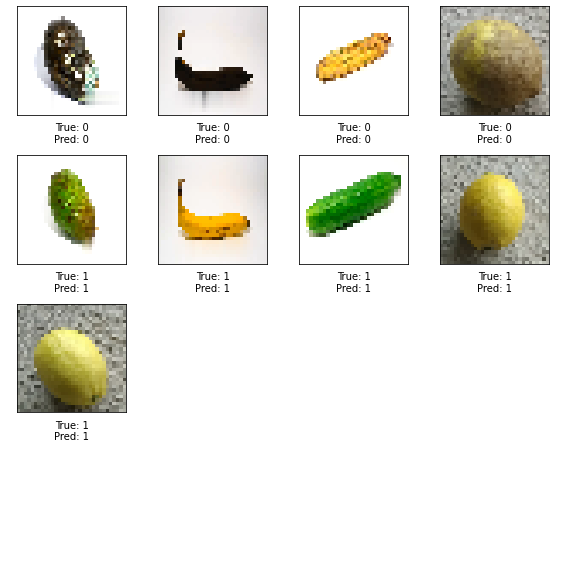

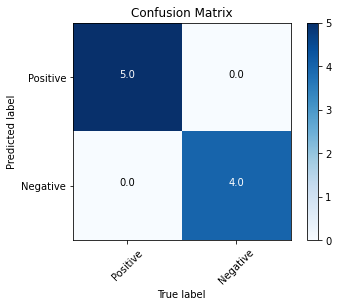

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


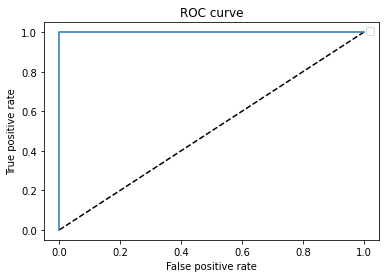

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


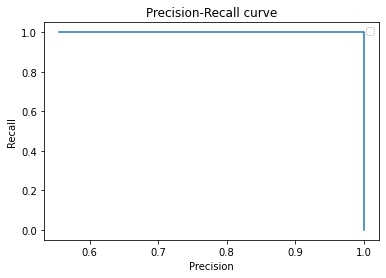

In [35]:
test_model(alexnet, fruits_original_other)

#### Results of running the model on various images from the internet

1/1 [==============================] - 0s 94ms/step - loss: 3.0154 - accuracy: 0.4444 - true_positives: 0.0000e+00 - true_negatives: 4.0000 - false_positives: 2.0000 - false_negatives: 3.0000


3.0154271125793457 0.4444444477558136 0.0 4.0 2.0 3.0


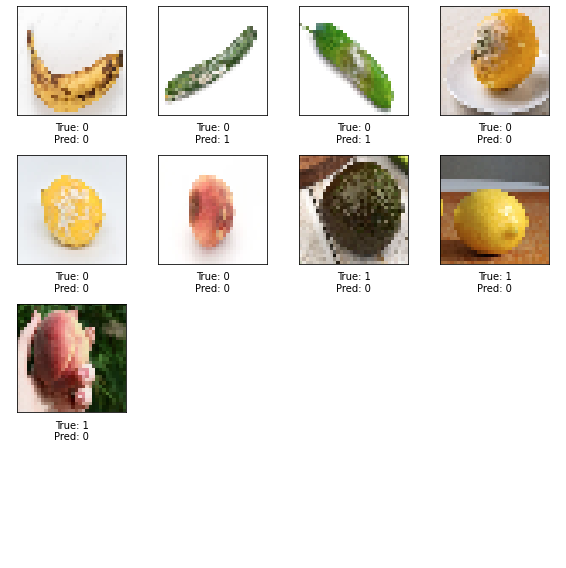

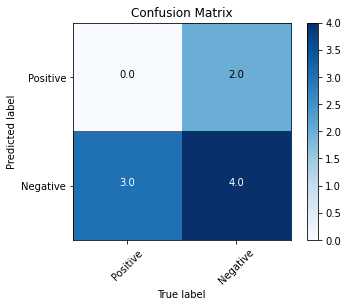

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


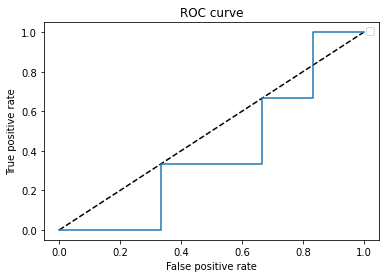

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


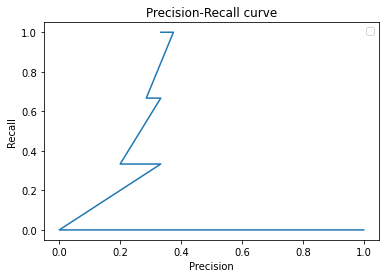

In [36]:
test_model(alexnet, fruits_test_other)

### Test custom CNN

In [39]:
mini = tf.keras.models.load_model(MINI, compile=True)

#### Results of running the model on subset of orginal dataset

1/1 [==============================] - 1s 541ms/step - loss: 0.0012 - accuracy: 1.0000 - true_positives: 5.0000 - true_negatives: 4.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
0.0011702709598466754 1.0 5.0 4.0 0.0 0.0


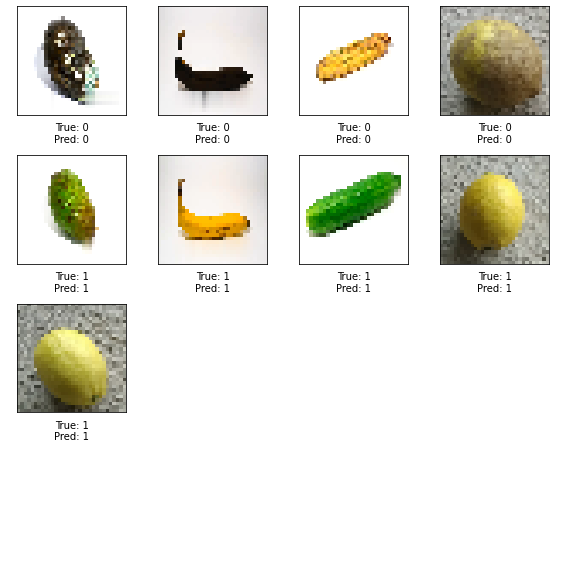

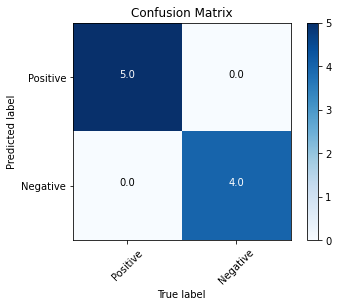

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


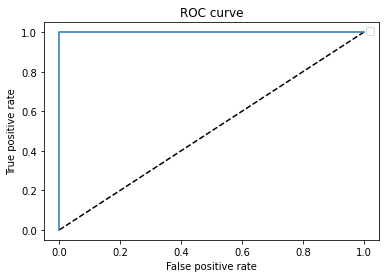

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


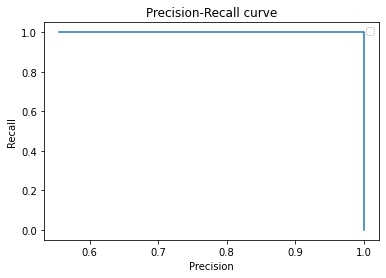

In [40]:
test_model(mini, fruits_original_other)

#### Results of running the model on various images from the internet

1/1 [==============================] - ETA: 0s - loss: 4.6176 - accuracy: 0.4444 - true_positives: 1.0000 - true_negatives: 3.0000 - false_positives: 3.0000 - false_negatives: 2.0000

1/1 [==============================] - 0s 106ms/step - loss: 4.6176 - accuracy: 0.4444 - true_positives: 1.0000 - true_negatives: 3.0000 - false_positives: 3.0000 - false_negatives: 2.0000
4.617622375488281 0.4444444477558136 1.0 3.0 3.0 2.0


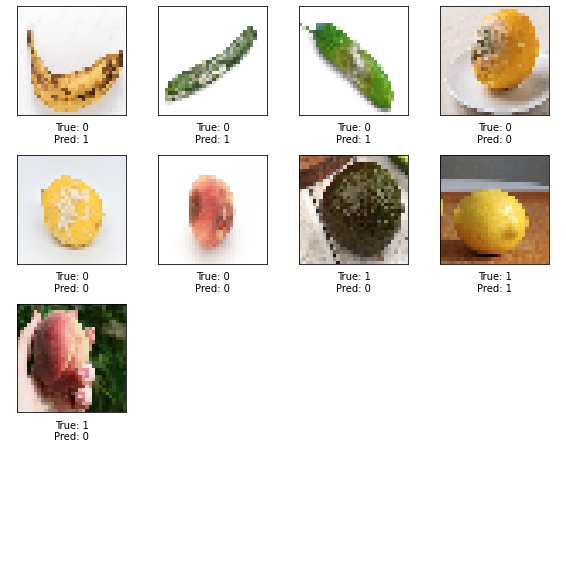

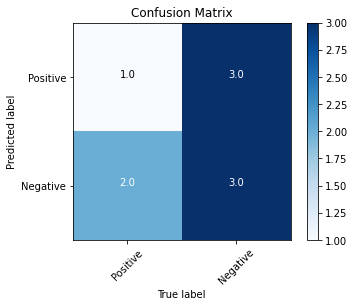

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


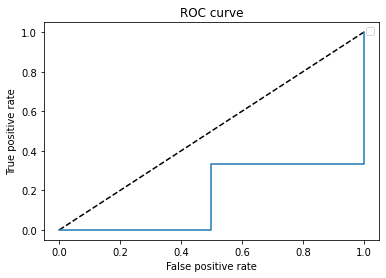

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


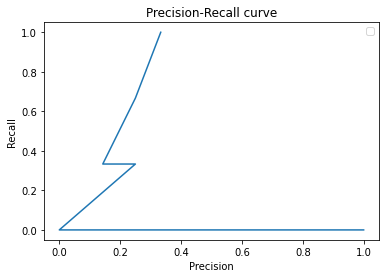

In [41]:
test_model(mini, fruits_test_other)

### Test ResNet

In [28]:
resnet = tf.keras.applications.resnet.ResNet152(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE_RESNET)
resnet.trainable = False

In [30]:
classifier = tf.keras.models.load_model(RESNET, compile=False)

inputs = keras.Input(shape=INPUT_SHAPE_RESNET)
x = tf.keras.applications.resnet.preprocess_input(inputs)
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = classifier(x)
model = keras.Model(inputs, outputs)

#### Results of running the model on subset of orginal dataset

In [32]:
training_settings = get_builtin_training_settings(BuiltInTraining.RESNET)
model = compile_model(model, training_settings)

1/1 [==============================] - 11s 11s/step - loss: 0.0035 - accuracy: 1.0000 - true_positives: 5.0000 - true_negatives: 4.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
0.00350204692222178 1.0 5.0 4.0 0.0 0.0


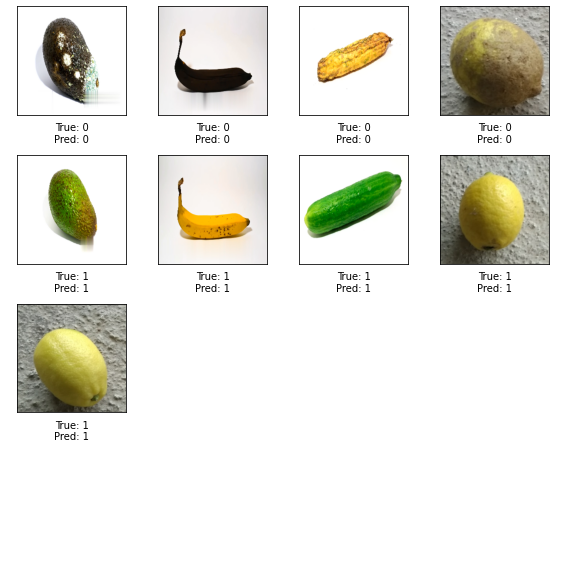

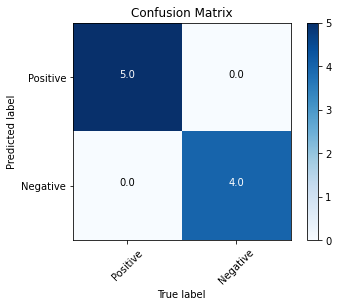

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


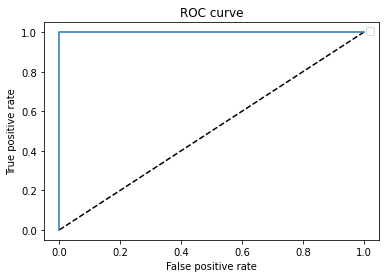

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


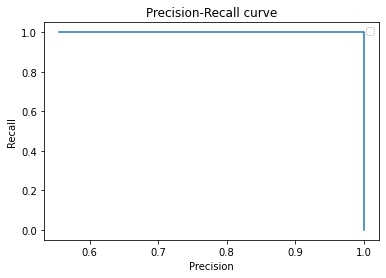

In [33]:
test_model(model, fruits_original_resnet)

#### Results of running the model on various images from the internet

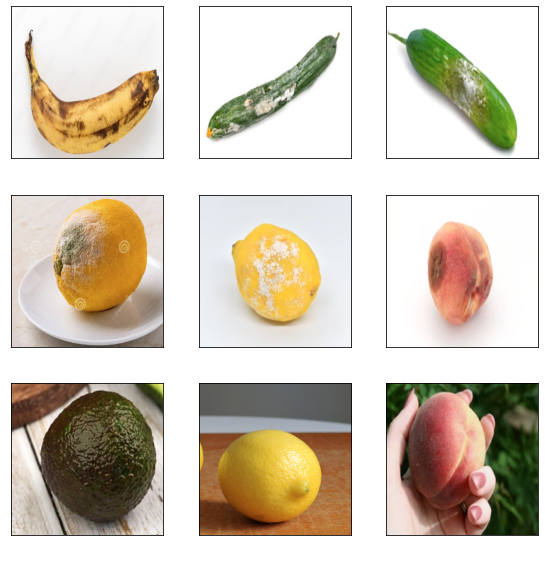

In [146]:
test_model(model, fruits_test_resnet)